In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
raw_data = np.load('../Project/GCN/input/superpose/superpose_GaoA-GDPG.npz')['arr_0']

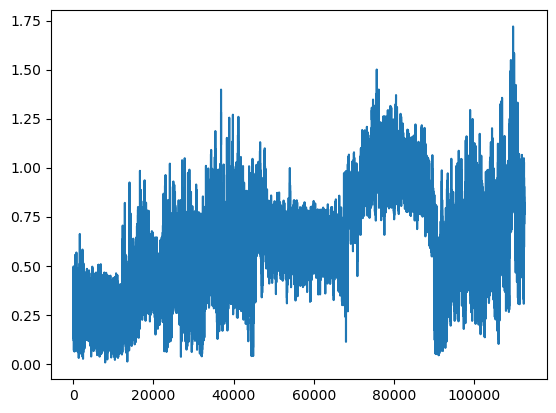

In [5]:
plt.plot(raw_data[:,:,180])

In [10]:
def get_rp1ns(system):
    filenames = os.listdir(f'input/data/{system}')
    rp_1ns = np.zeros([330,330])
    for filename in filenames:
        data = np.load(os.path.join(f'input/data/{system}',filename),allow_pickle=True).item()
        rp_1ns += data['rp_1ns']
    rp_1ns/len(filenames)
    return rp_1ns

In [16]:
def get_rp90ns(system):
    filenames = os.listdir(f'input/data/{system}')
    rp_90ns = np.zeros([330,330])
    for filename in filenames:
        data = np.load(os.path.join(f'input/data/{system}',filename),allow_pickle=True).item()
        rp_90ns += data['rp_90ns']
    rp_90ns/len(filenames)
    return rp_90ns

In [8]:
def draw_graph(rp_1ns,output):
    plt.imshow(rp_1ns,cmap='jet', interpolation='bilinear')
    plt.xlim(199-25,223-25)
    plt.ylim(199-25,223-25)
    x_ticks = np.arange(0, rp_1ns.shape[1], 5)
    y_ticks = np.arange(0, rp_1ns.shape[0], 5)
    
    # 定义刻度标签
    x_tick_labels = [f"{tick+25}" for tick in x_ticks]  # 例如，标签为 'x0', 'x50', ...
    y_tick_labels = [f"{tick+25}" for tick in y_ticks]  # 例如，标签为 'y0', 'y50', ...
    index_list = [204.5,205.5]
    index_list = [index-25 for index in index_list]
    for index in index_list:
        plt.axvline(x=index,color='seashell',linestyle='--',ymin=1-index/330,linewidth=6)
        plt.axhline(index,color='seashell',linestyle='--',xmin=index/330,linewidth=6)
    plt.colorbar()
    plt.savefig(output)

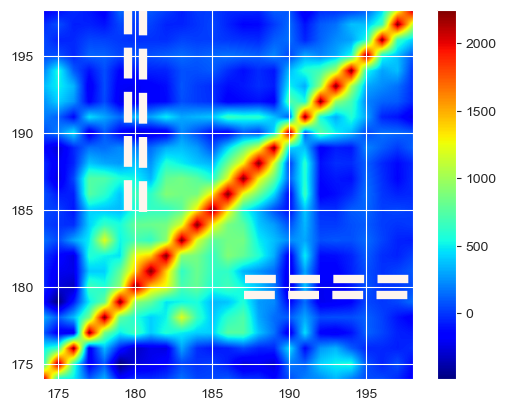

In [11]:
rp_1ns = get_rp1ns('GaoB-GTPG-MG')
draw_graph(rp_1ns,'data_distribution/GaoB-GTPG-MG-rp_1ns.jpg')

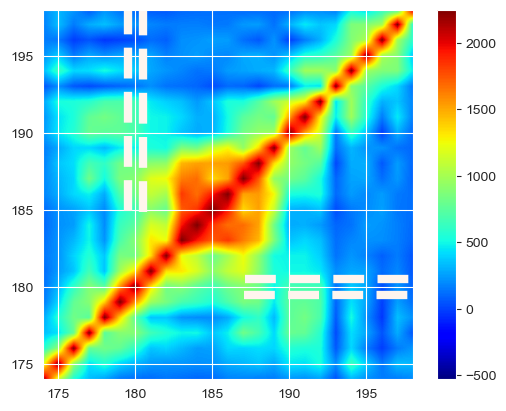

In [12]:
rp_1ns = get_rp1ns('GaoA-GDPG')
draw_graph(rp_1ns,'data_distribution/GaoA-GDPG-rp_1ns.jpg')

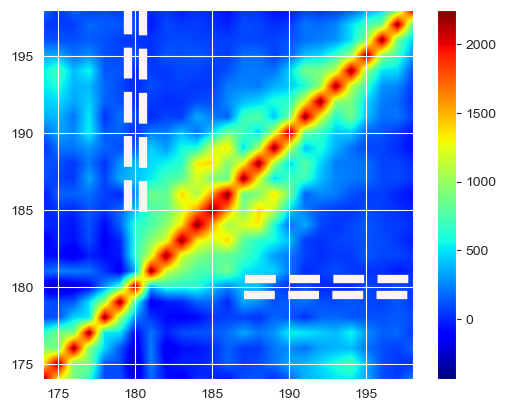

In [13]:
rp_1ns = get_rp1ns('GaoA-Q205L-GDPG-MG')
draw_graph(rp_1ns,'data_distribution/GaoA-Q205L-GDPG-MG-rp_1ns.jpg')

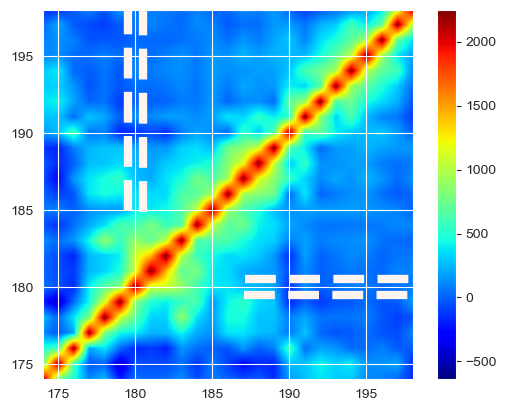

In [15]:
rp_1ns = get_rp1ns('GaoB-Q205L-GTPG-MG')
draw_graph(rp_1ns,'data_distribution/GaoB-Q205L-GTPG-MG-rp_1ns.jpg')

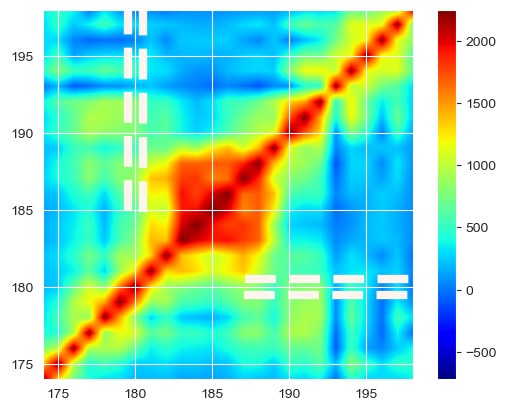

In [17]:
rp_90ns = get_rp90ns('GaoA-GDPG')
draw_graph(rp_90ns,'data_distribution/GaoA-GDPG-rp_90ns.jpg')

In [29]:
rp_raw_list = rp_raw.flatten()
print(rp_raw_list.shape)

(108900,)


In [36]:
np.percentile(rp_raw_list,30)

0.05044248597064698

In [31]:
np.percentile(rp_raw_list,80)

0.3037792616438191

### switch II

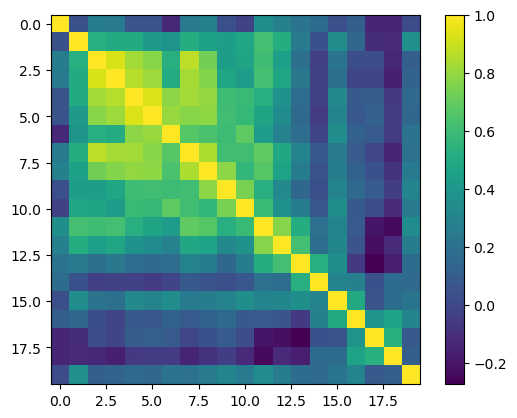

In [34]:
plt.imshow(rp_raw[176:196,176:196])
plt.colorbar()

In [48]:
np.where(rp_raw_list>0.1)

(array([     0,      1,      2, ..., 108897, 108898, 108899], dtype=int64),)

In [39]:
system = 'GaoA-GDPG'
filenames = os.listdir(f'input/data/{system}')
rp_raw = np.zeros([330,330])
for filename in filenames:
    data = np.load(os.path.join(f'input/data/{system}',filename),allow_pickle=True).item()
    rp_raw += data['rp_raw']

In [40]:
rp_raw = rp_raw/len(filenames)

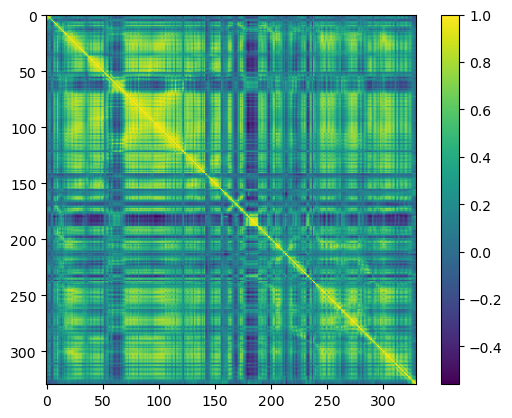

In [41]:
plt.imshow(rp_raw)
plt.colorbar()

In [42]:
rp_raw_list = rp_raw.flatten()
np.percentile(rp_raw_list,25)

0.11044146383934512

In [43]:
system = 'Gao-3sn6'
filenames = os.listdir(f'input/data/{system}')
rp_raw = np.zeros([330,330])
for filename in filenames:
    data = np.load(os.path.join(f'input/data/{system}',filename),allow_pickle=True).item()
    rp_raw += data['rp_raw']

In [44]:
rp_raw = rp_raw/len(filenames)

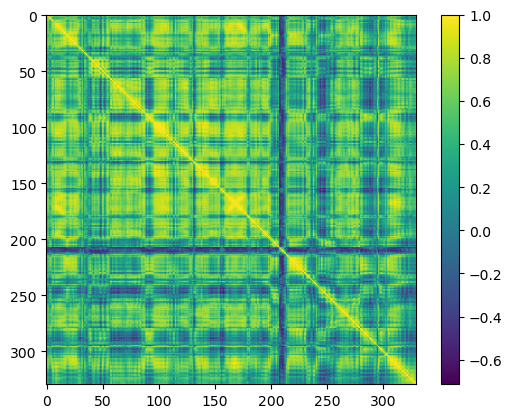

In [45]:
plt.imshow(rp_raw)
plt.colorbar()

In [46]:
rp_raw_list = rp_raw.flatten()
np.percentile(rp_raw_list,25)

0.237923588983907

印证猜想：switch II是往复运动

In [1]:
def load_data(filename):
    raw_data = np.load(filename)
    raw_data = raw_data['arr_0']
    raw_data = np.squeeze(raw_data)
    print(raw_data.shape)
    return raw_data


In [93]:
raw_data = load_data('input/superpose/superpose_GaoA-GDPG.npz')[:,176:196]

(112500, 330)


In [94]:
data_list_450ns = np.mean(np.split(raw_data, 5),axis=0)
data_list_90ns = np.mean(np.split(raw_data, 25),axis=0)
data_list_50ns = np.mean(np.split(raw_data, 45),axis=0)
data_list_10ns = np.mean(np.split(raw_data, 225),axis=0)
data_list_5ns = np.mean(np.split(raw_data, 450),axis=0)
data_list_1ns = np.mean(np.split(raw_data, 2250),axis=0)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c241da4ad0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c257ec8e50>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c257f0a050>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c257f11010>}

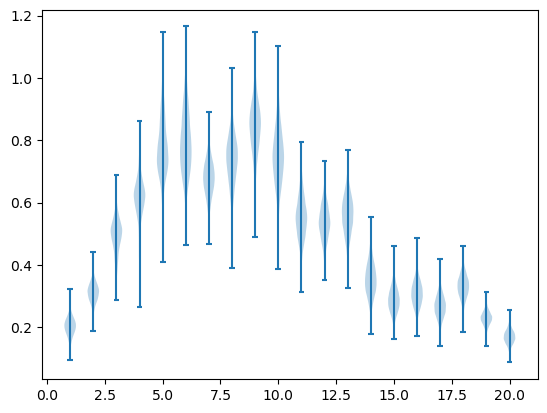

In [30]:
import matplotlib.pyplot as plt
plt.violinplot(data_list_450ns)

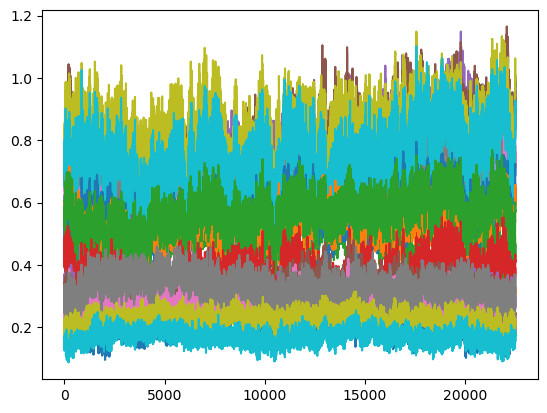

In [69]:
plt.plot(data_list_450ns)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c257f83190>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c257489790>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c257f08e50>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c257fe39d0>}

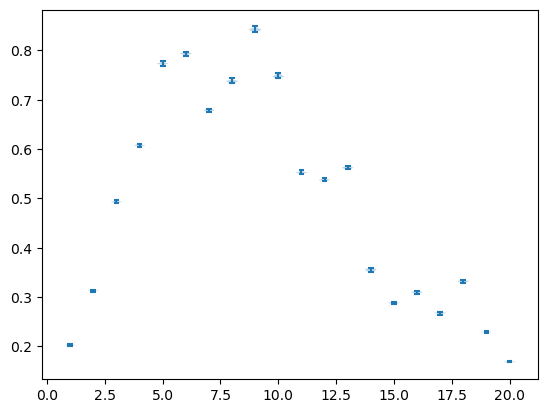

In [31]:
plt.violinplot(data_list_1ns)

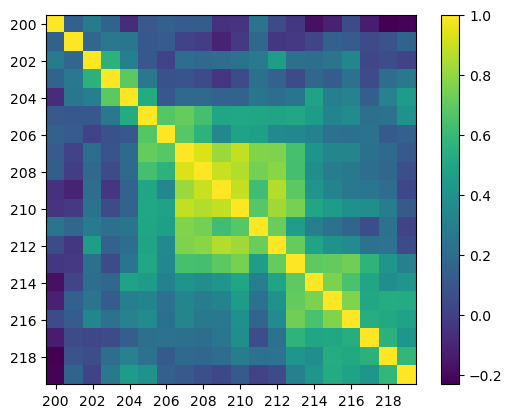

In [95]:
plt.imshow(np.corrcoef(data_list_1ns.T) )
plt.xticks(range(0,20,2),range(200,220,2))
plt.yticks(range(0,20,2),range(200,220,2))
plt.colorbar()

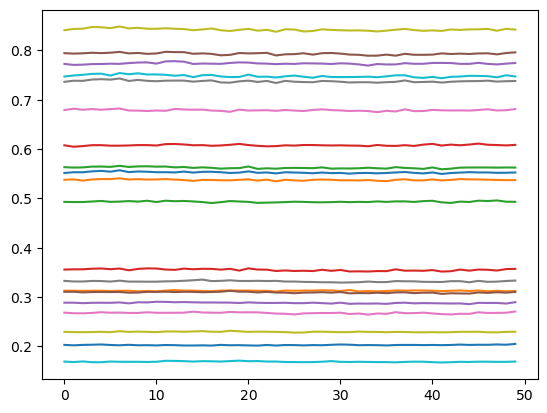

In [37]:
plt.plot(data_list_1ns)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c258049050>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c25804bb50>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c2580a03d0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c25804b850>}

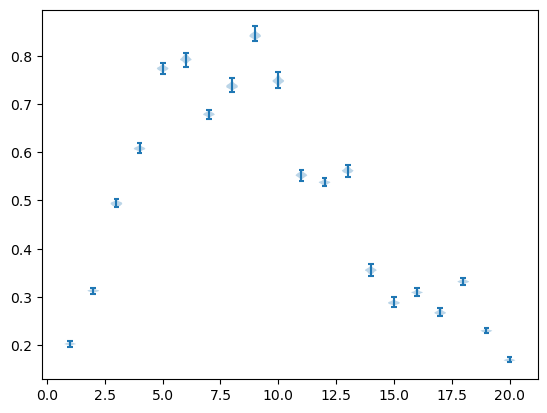

In [32]:
plt.violinplot(data_list_5ns)

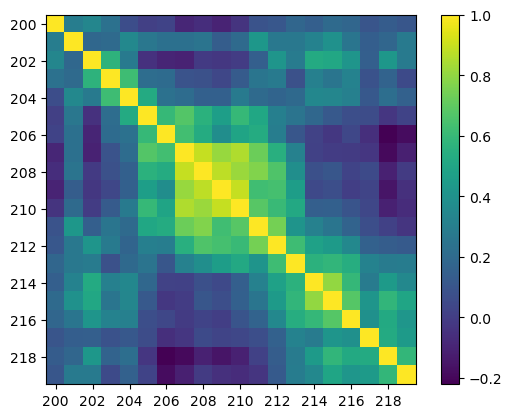

In [97]:
plt.imshow(np.corrcoef(data_list_5ns.T) )
plt.xticks(range(0,20,2),range(200,220,2))
plt.yticks(range(0,20,2),range(200,220,2))
plt.yticks(range(0,20,2),range(200,220,2))
plt.colorbar()

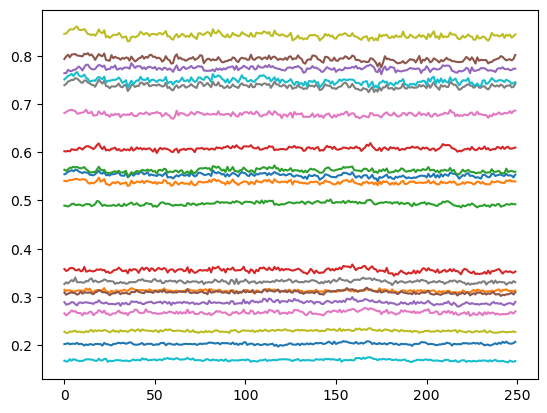

In [38]:
plt.plot(data_list_5ns)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c258101410>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c2580ef710>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c25b726790>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c25733d390>}

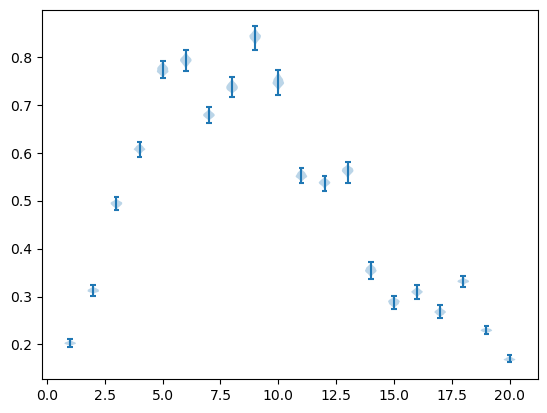

In [33]:
plt.violinplot(data_list_10ns)

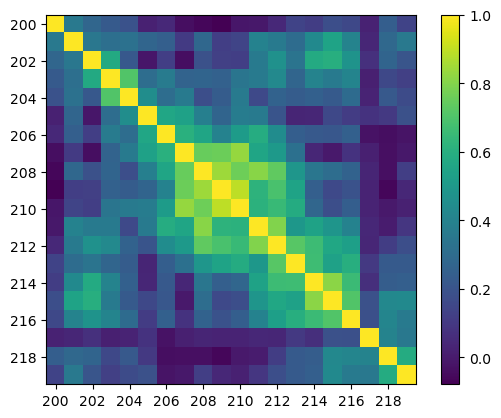

In [98]:
plt.imshow(np.corrcoef(data_list_10ns.T) )
plt.xticks(range(0,20,2),range(200,220,2))
plt.yticks(range(0,20,2),range(200,220,2))
plt.colorbar()

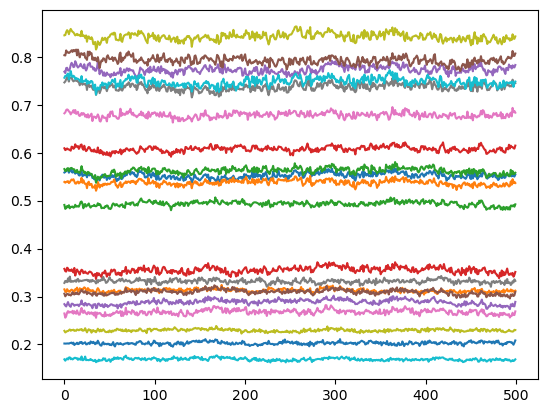

In [39]:
plt.plot(data_list_10ns)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c25b772650>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c2580afa50>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c25b7e9810>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c2580c39d0>}

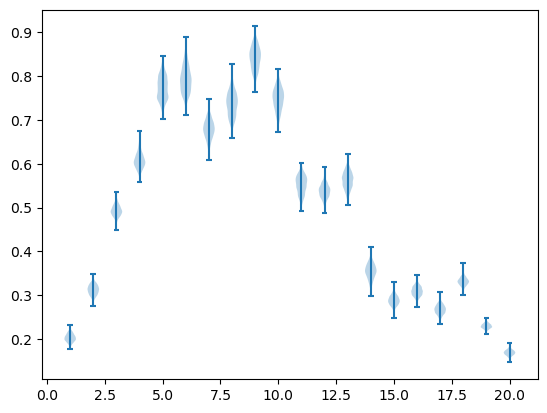

In [34]:
plt.violinplot(data_list_50ns)

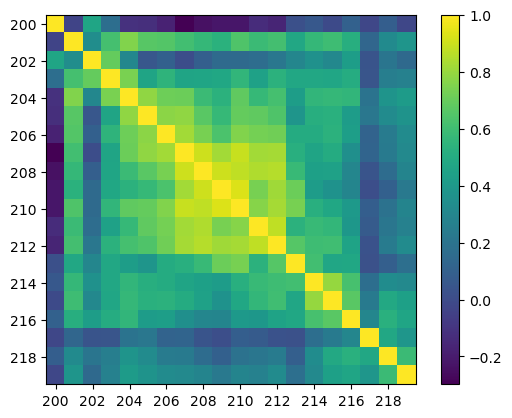

In [99]:
plt.imshow(np.corrcoef(data_list_50ns.T) )
plt.xticks(range(0,20,2),range(200,220,2))
plt.yticks(range(0,20,2),range(200,220,2))
plt.colorbar()

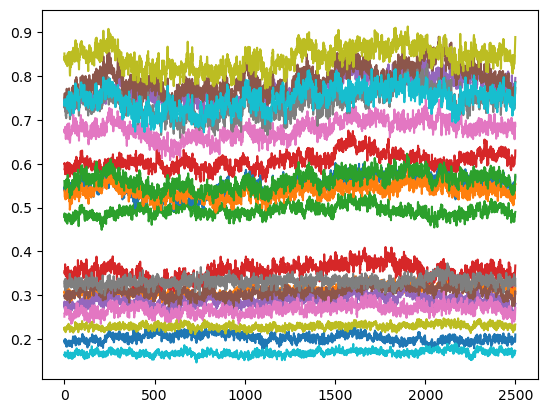

In [40]:
plt.plot(data_list_50ns)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c25b80f850>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c25ba04b50>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c25b977390>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c258173dd0>}

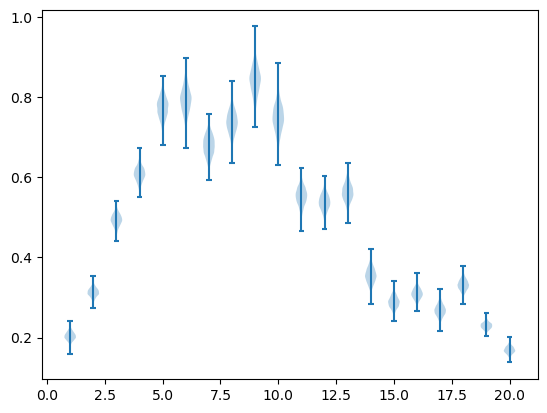

In [35]:
plt.violinplot(data_list_90ns)

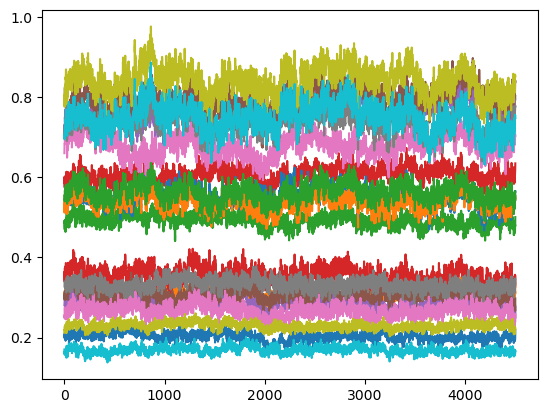

In [41]:
plt.plot(data_list_90ns)

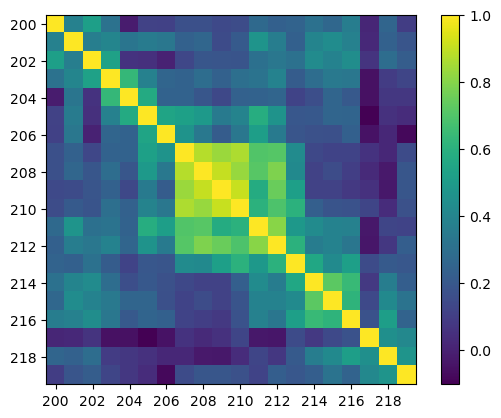

In [100]:
plt.imshow(np.corrcoef(data_list_90ns.T) )
plt.xticks(range(0,20,2),range(200,220,2))
plt.yticks(range(0,20,2),range(200,220,2))
plt.colorbar()

In [101]:
raw_data = load_data('input/superpose/superpose_GaoB-GTPG-MG.npz')[:,176:196]

(112500, 330)


In [102]:
data_list_450ns = np.mean(np.split(raw_data, 5),axis=0)
data_list_90ns = np.mean(np.split(raw_data, 25),axis=0)
data_list_50ns = np.mean(np.split(raw_data, 45),axis=0)
data_list_10ns = np.mean(np.split(raw_data, 225),axis=0)
data_list_5ns = np.mean(np.split(raw_data, 450),axis=0)
data_list_1ns = np.mean(np.split(raw_data, 2250),axis=0)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c24db29050>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c24da8c290>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c24db24f50>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c24db38ed0>}

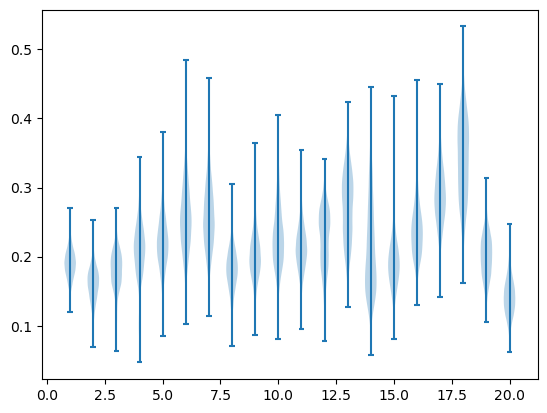

In [45]:
plt.violinplot(data_list_450ns)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c25bb1b490>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c24da6ac50>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c24da7d310>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c25bd4f710>}

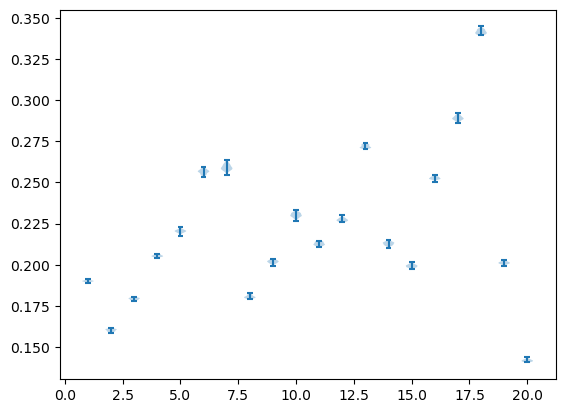

In [44]:
plt.violinplot(data_list_1ns)

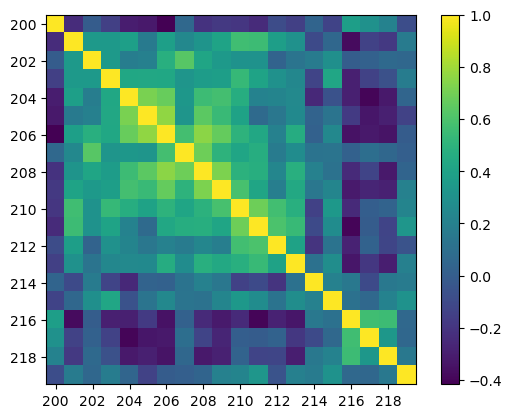

In [103]:
plt.imshow(np.corrcoef(data_list_1ns.T) )
plt.xticks(range(0,20,2),range(200,220,2))
plt.yticks(range(0,20,2),range(200,220,2))
plt.colorbar()

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c24dbbb150>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c24dc1b2d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c24dc28c10>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c24dc38a90>}

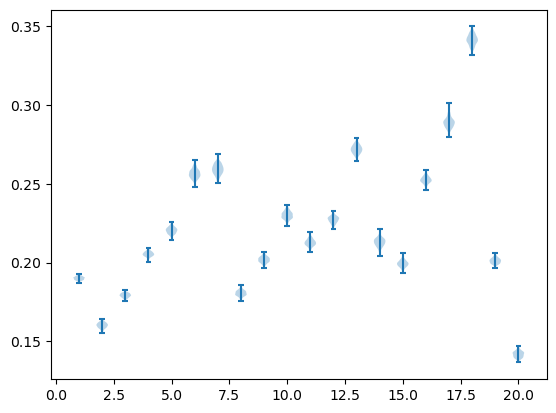

In [46]:
plt.violinplot(data_list_5ns)

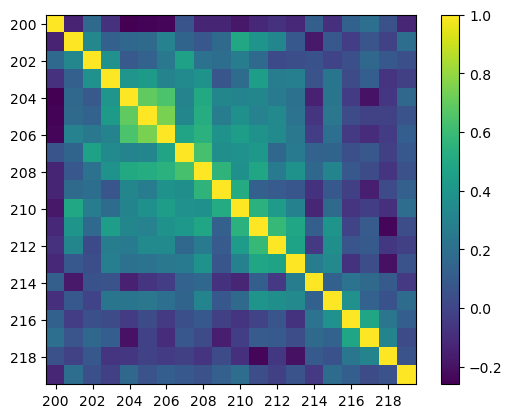

In [104]:
plt.imshow(np.corrcoef(data_list_5ns.T) )
plt.xticks(range(0,20,2),range(200,220,2))
plt.yticks(range(0,20,2),range(200,220,2))
plt.colorbar()

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c24dac3110>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c24de12c50>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c24de38e90>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c24ddce490>}

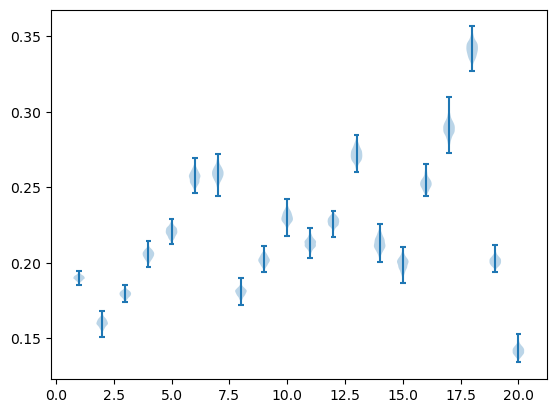

In [47]:
plt.violinplot(data_list_10ns)

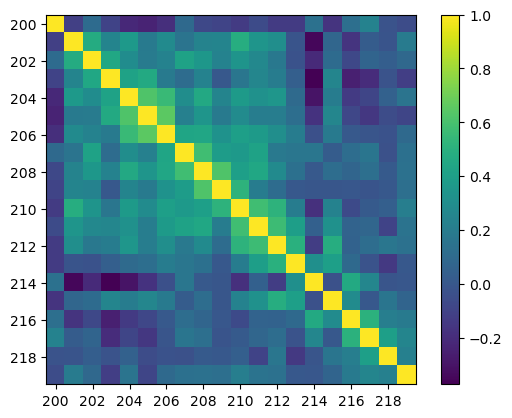

In [105]:
plt.imshow(np.corrcoef(data_list_10ns.T) )
plt.xticks(range(0,20,2),range(200,220,2))
plt.yticks(range(0,20,2),range(200,220,2))
plt.colorbar()

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c24de13d50>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c24de5c210>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c24dcd0e90>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c24dcd3890>}

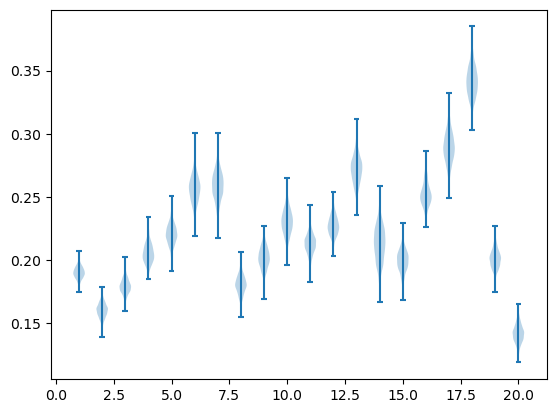

In [48]:
plt.violinplot(data_list_50ns)

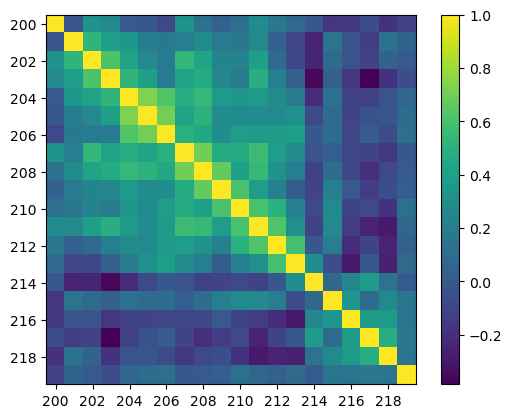

In [106]:
plt.imshow(np.corrcoef(data_list_50ns.T) )
plt.xticks(range(0,20,2),range(200,220,2))
plt.yticks(range(0,20,2),range(200,220,2))
plt.colorbar()

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c24dd16890>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1c24dd5ca10>,
 'cmins': <matplotlib.collections.LineCollection at 0x1c24dedef50>,
 'cbars': <matplotlib.collections.LineCollection at 0x1c24dcbd990>}

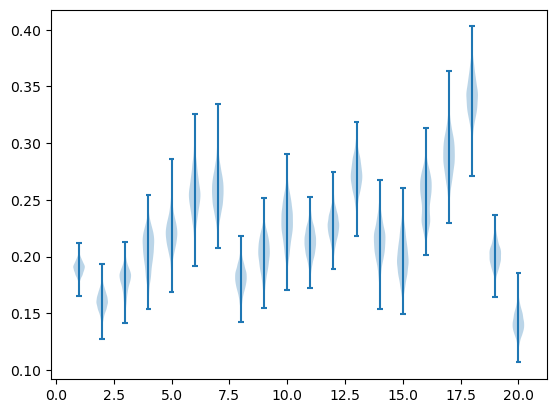

In [49]:
plt.violinplot(data_list_90ns)

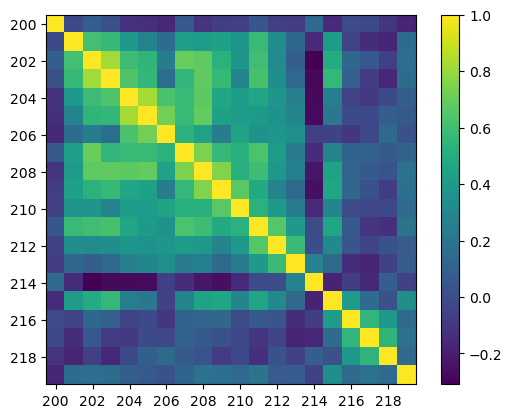

In [107]:
plt.imshow(np.corrcoef(data_list_90ns.T) )
plt.xticks(range(0,20,2),range(200,220,2))
plt.yticks(range(0,20,2),range(200,220,2))
plt.colorbar()